In [ ]:
%pip install numpy pandas seaborn matplotlib scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#1. How many employees are currently in the company?
df['EmployeeNumber'].count()

np.int64(1470)

In [ ]:
#2. What is the total number and percentage of employees who have left (attrition)?
employee_left = df[df['Attrition']== 'Yes'].value_counts().shape[0]

print("Employee left: ", employee_left)

(df['Attrition'].value_counts(normalize= True)*100).reset_index()



Employee left:  237


,Attrition,proportion
0,No,83.877551
1,Yes,16.122449


In [ ]:
#3. What is the average age, income, and years of service of employees?
df[['Age','MonthlyIncome', 'YearsAtCompany']].mean()

,0
Age,36.923810
MonthlyIncome,6502.931293
YearsAtCompany,7.008163


In [ ]:
#4. Which department has the highest attrition rate?
(df[df['Attrition'] == 'Yes']['Department'].value_counts(normalize = True)*100).reset_index(name = 'Attrition Rate')

,Department,Attrition Rate
0,Research & Development,56.118143
1,Sales,38.818565
2,Human Resources,5.063291


In [ ]:
#5. Does attrition differ by gender?
df.groupby(['Gender','Attrition']).size().reset_index(name = 'Count')

,Gender,Attrition,Count
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


In [ ]:
#5 ALT. Does attrition differ by gender?
out = df.groupby(['Gender','Attrition']).size().reset_index(name='Count')
out['Percent'] = out['Count'] / out.groupby('Gender')['Count'].transform('sum') * 100
out

(df[df['Attrition'] == 'Yes']['Gender'].value_counts(normalize = True)*100).reset_index(name = 'AttritionRate')

,Gender,AttritionRate
0,Male,63.291139
1,Female,36.708861


In [ ]:
#6. Are younger employees leaving more often than older ones?
df['AgeCategory'] = pd.cut(df['Age'], bins=[0,30,45,float('inf')], labels = ['Young', 'Middle-aged', 'Senior'])

df.head()



(df[df['Attrition'] == 'Yes']['AgeCategory'].value_counts(normalize = True)*100).reset_index(name = 'Attrition Rate')

,AgeCategory,Attrition Rate
0,Middle-aged,43.459916
1,Young,42.194093
2,Senior,14.345992


In [ ]:
#7. Does experience (YearsAtCompany) have any link with attrition?
df['AttritionFlag'].corr(df['YearsAtCompany'])
#Insight: Weakly Negative link


np.float64(-0.13439221398997678)

In [ ]:
#8. Is attrition more common among employees with lower salaries?
df['IncomeCategory'] = pd.cut(df['MonthlyIncome'], bins = [0,5000,10000,float('inf')], labels = ['Low', 'Medium', 'High'])

(df[df['Attrition'] == 'Yes']['IncomeCategory'].value_counts(normalize = True)*100).reset_index(name = 'Attrition Rate')


,IncomeCategory,Attrition Rate
0,Low,68.776371
1,Medium,20.675105
2,High,10.548523


In [ ]:
#9. What is the average salary in each department?
df.groupby('Department')['MonthlyIncome'].mean().reset_index()

,Department,MonthlyIncome
0,Human Resources,6654.507937
1,Research & Development,6281.252862
2,Sales,6959.172646


In [ ]:
#10. Is there a correlation between YearsAtCompany and MonthlyIncome?
df[['YearsAtCompany', 'MonthlyIncome']].corr()

,YearsAtCompany,MonthlyIncome
YearsAtCompany,1.000000,0.514285
MonthlyIncome,0.514285,1.000000


In [ ]:
#11. Do employees with higher education levels earn more on average?
df['EducationLevel'] = df['Education'].map({1: 'High School', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Ph.D'})
df['EducationLevel'].value_counts().reset_index(name = 'EmployeeCount')
df.groupby('EducationLevel')['MonthlyIncome'].mean().reset_index().sort_values('MonthlyIncome', ascending = False)


,EducationLevel,MonthlyIncome
4,Ph.D,8277.645833
3,Master,6832.402010
0,Bachelor,6517.263986
1,College,6226.645390
2,High School,5640.570588


In [ ]:
df['EducationLevel'].value_counts().reset_index(name = 'EmployeeCount').sort_values('EmployeeCount', ascending = False)

,EducationLevel,EmployeeCount
0,Bachelor,572
1,Master,398
2,College,282
3,High School,170
4,Ph.D,48


In [ ]:
#12. What is the distribution of employees across Age, Gender, and EducationField?
print("Employee Distribution by Age:\n")
print((df['AgeCategory'].value_counts(normalize = True)*100).reset_index(name = 'Employee %').sort_values('Employee %'),"\n")
print("Employee Distribution by Gender:\n")
print((df['Gender'].value_counts(normalize = True)*100).reset_index(name = 'Employee %').sort_values('Employee %'), "\n")
print("Employee Distribution by Education Field:\n")
print((df['EducationField'].value_counts(normalize = True)*100).reset_index(name = 'Employee %').sort_values('Employee %'), "\n")


Employee Distribution by Age:

   AgeCategory  Employee %
2       Senior   18.571429
1        Young   26.258503
0  Middle-aged   55.170068 

Employee Distribution by Gender:

   Gender  Employee %
1  Female        40.0
0    Male        60.0 

Employee Distribution by Education Field:

     EducationField  Employee %
5   Human Resources    1.836735
4             Other    5.578231
3  Technical Degree    8.979592
2         Marketing   10.816327
1           Medical   31.564626
0     Life Sciences   41.224490 



In [ ]:
#13. Which job roles are most common, and which roles face more attrition?
jobPosition = df['JobRole'].value_counts().reset_index(name = 'EmployeeCount')
print(jobPosition.head(1), "\n")

attr_by_role = (df[df['Attrition'] == 'Yes']['JobRole'].value_counts(normalize= True)*100).reset_index(name = 'AttritionRate')
print(attr_by_role.head(1))

           JobRole  EmployeeCount
0  Sales Executive            326 

                 JobRole  AttritionRate
0  Laboratory Technician      26.160338


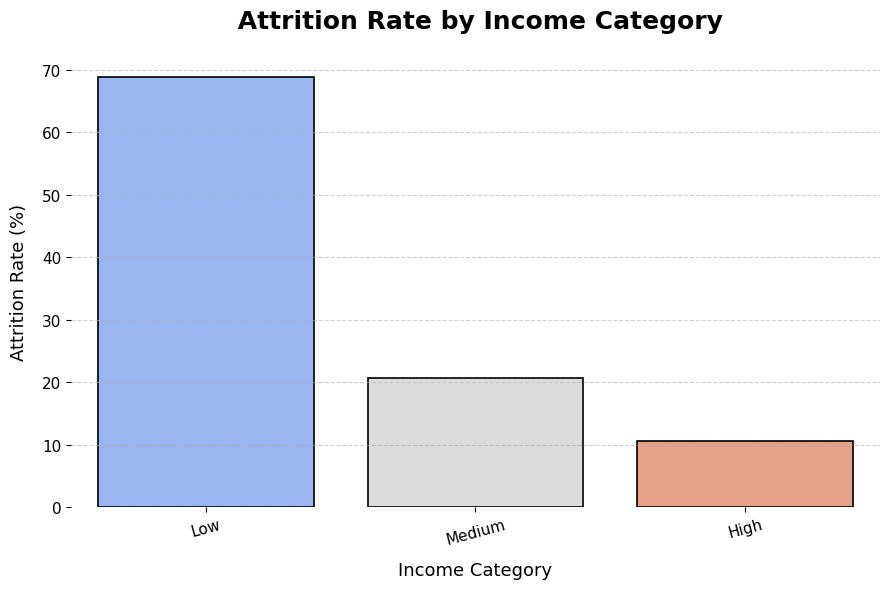

In [ ]:
#14. Can we identify any trend where employees are more likely to leave?
#Insight: Employees with lower salary are more likely to leave
atr_trend = (df[df['Attrition'] == 'Yes']['IncomeCategory'].value_counts(normalize = True)*100).reset_index(name = 'Attrition Rate')


plt.figure(figsize=(9,6))

# Plot with gradient palette and borders
ax = sns.barplot(
    x='IncomeCategory',
    y='Attrition Rate',

    data=atr_trend,
    hue = 'IncomeCategory',
    palette='coolwarm',      # Try also 'magma', 'coolwarm', 'crest', or 'flare'
    edgecolor='black',
    linewidth=1.2
)

# Add titles and labels
plt.title(' Attrition Rate by Income Category', fontsize=18, weight='bold', pad=20)
plt.xlabel('Income Category', fontsize=13, labelpad=10)
plt.ylabel('Attrition Rate (%)', fontsize=13, labelpad=10)

# x-labels  rotation
plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=11)

sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

In [ ]:
#15.1.What are the top 3 factors contributing to attrition (from correlation analysis)?
df['AttritionFlag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
corrAt = df.drop(['EmployeeCount', 'StandardHours'], axis = 1).corr(numeric_only = True)
negTop3 = corrAt.nlargest(4, 'AttritionFlag')['AttritionFlag'][1:4]
posTop3 = corrAt.nsmallest(4, 'AttritionFlag')['AttritionFlag'][1:4]
print(negTop3, "\n")
print(posTop3, "\n")




DistanceFromHome      0.077924
NumCompaniesWorked    0.043494
MonthlyRate           0.015170
Name: AttritionFlag, dtype: float64 

JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Name: AttritionFlag, dtype: float64 



<Axes: >

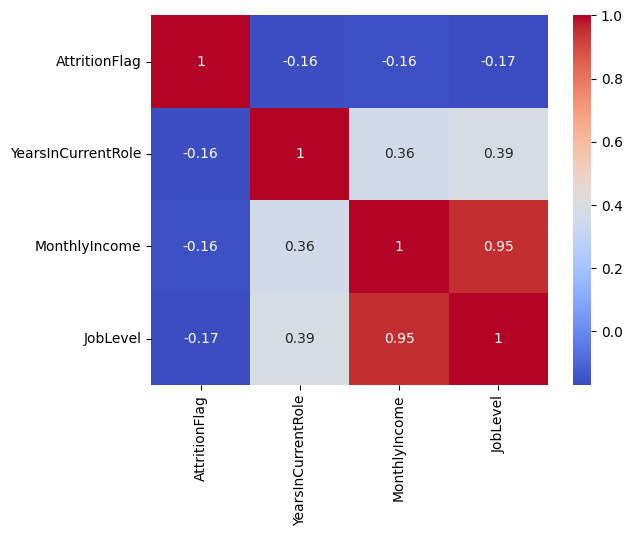

In [ ]:
#15.2.What are the top 3 factors contributing to attrition (from correlation analysis)?
atrCorr = df[['AttritionFlag', 'YearsInCurrentRole','MonthlyIncome','JobLevel']].corr()
sns.heatmap(atrCorr, annot = True, cmap = 'coolwarm')

In [ ]:
#16. What’s the average tenure of employees who left vs. stayed?
df.groupby('Attrition')['YearsAtCompany'].mean()

,YearsAtCompany
Attrition,
No,7.369019
Yes,5.130802


/tmp/ipython-input-3213290873.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


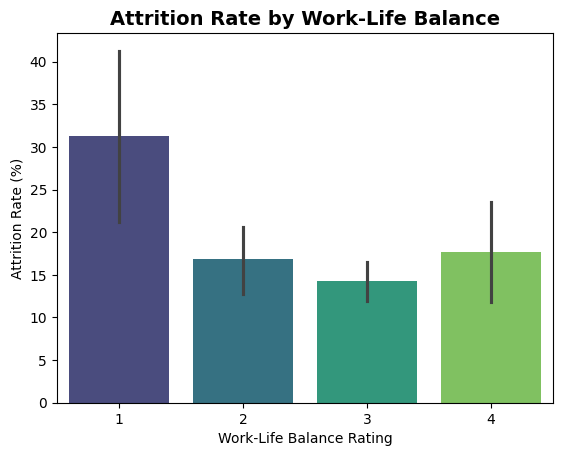

In [ ]:
#17.How does work-life balance rating correlate with attrition?
sns.barplot(
    data=df,
    x='WorkLifeBalance',
    y='AttritionFlag',
    estimator=lambda x: x.mean()*100,
    palette='viridis'
)
plt.title('Attrition Rate by Work-Life Balance', fontsize=14, weight='bold')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Work-Life Balance Rating')
plt.show()

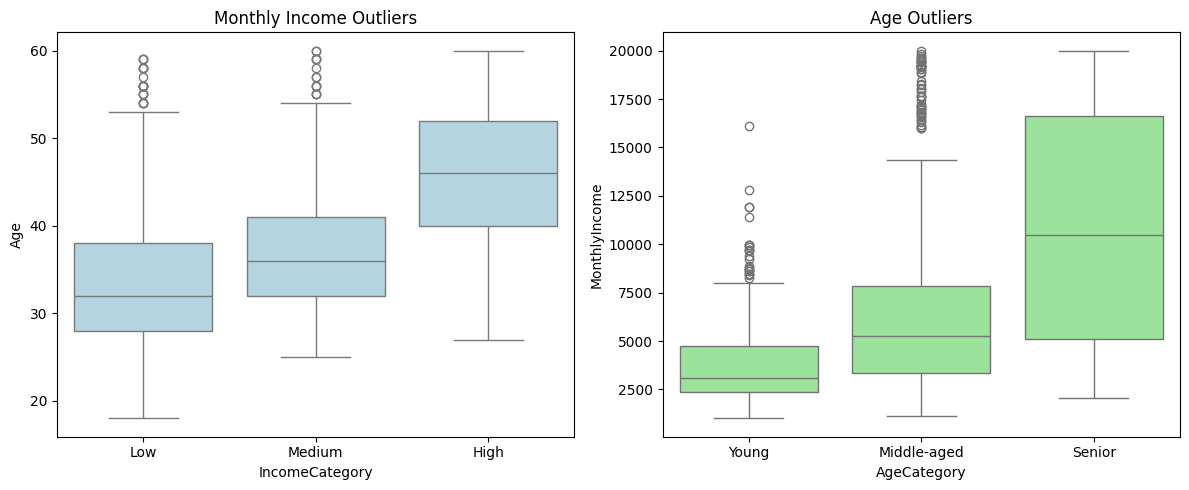

In [ ]:
# 18.Are there any outliers in salary or age that need HR attention?
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x='IncomeCategory', y =  'Age', color='lightblue')
plt.title('Monthly Income Outliers')

plt.subplot(1,2,2)
sns.boxplot(data = df, x='AgeCategory', y =  'MonthlyIncome', color='lightgreen')
plt.title('Age Outliers')

plt.tight_layout()
plt.show()